In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Demo of `RealDataSimulation`

A package by Julien Ars, created for a project with EPFL's [LUTS laboratory](luts.epfl.ch) under the supervision of Minru Wang.

This package allows the user to retrieve data about public transport lines in Switzerland, as well as creating pairs of coordinates that associate (fictitious) shops and customers based on OFS public geostat (STATENT and STATPOP) data.

It implements a robust download manager that checks whether a file has already been downloaded and can also unzip files as well as check the latest available data (for example, with public transport data).

The public transport data comes from [opentransportdata.swiss], in particular the ['Actual Data'](https://opentransportdata.swiss/en/dataset/istdaten) and the ['Service points'](https://opentransportdata.swiss/en/dataset/service-points-full) services.

The package provides the following classes :

## Area

A class to encode geographical data, with a plotting fonctionality (using maps from CARTO) and methods to test whether coordinates are inside the area

In [3]:
from RealDataSimulation.area import Area

Lowered zoom level to keep map size reasonable. (z = 14)


c:\Users\arsju\OneDrive\Documents\1 Etudes\EPFL MA3 2024-2025\PROJETS\DRONES\RealDataSimulation\area.py:95: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 1600x1600 with 1 Axes>, <Axes: >)

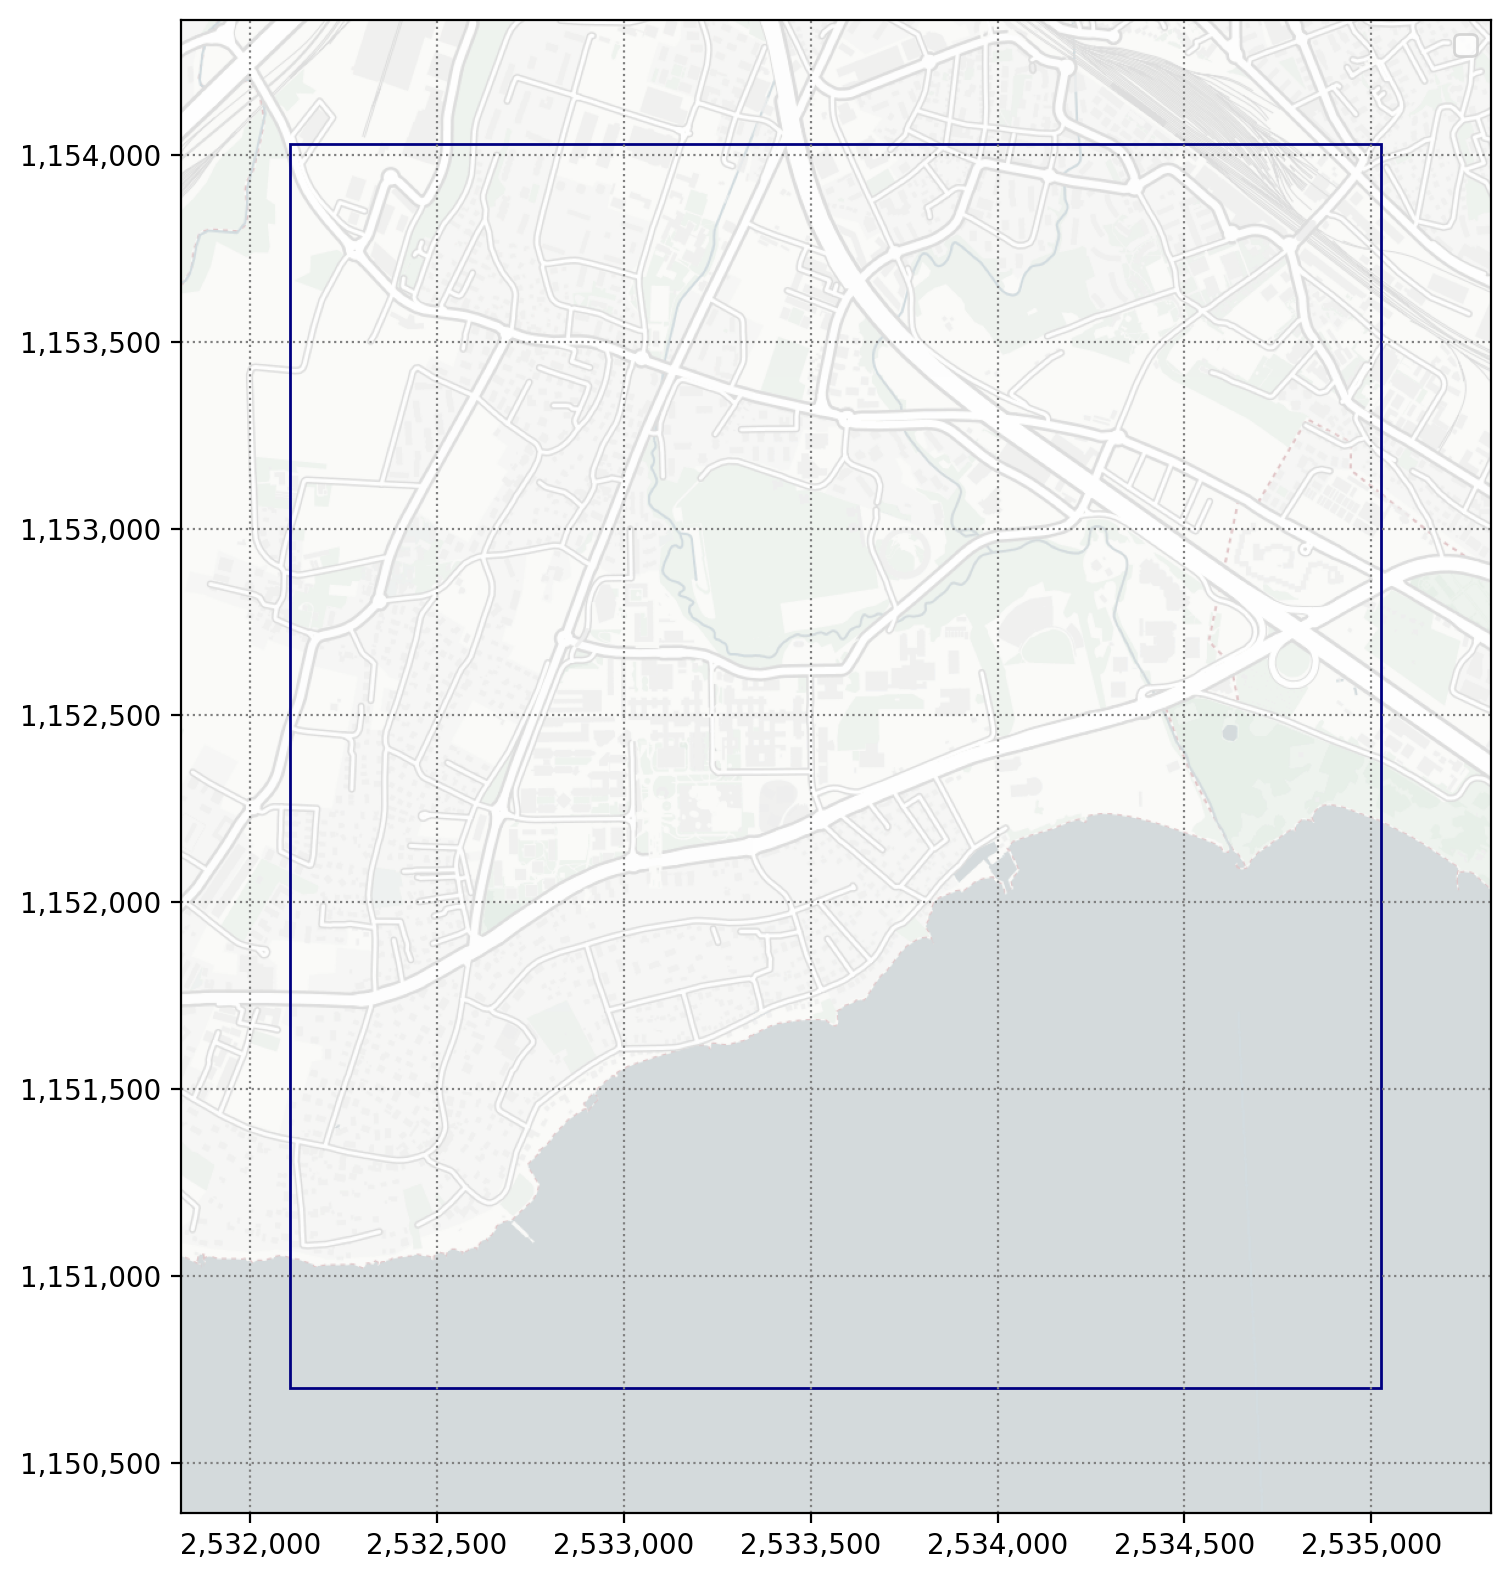

In [4]:
epfl = Area(2532106, 2535027, 1150700, 1154028)
epfl.plot(margin=0.1)

## Tasks.geostat.STAT

> Children : Tasks.geostat.STATPOP, Tasks.geostat.STATENT

A class that has capacity to generate dots for data that comes per hectare. Hectares are randomly chosen based on one of the statistics (number of people living there, etc...) and a random point in the selected hectare is then generated

In [7]:
from RealDataSimulation.Tasks.geostat import STATPOP, STATENT

### Tasks.geostat.STATPOP

In [16]:
population = STATPOP(epfl)
population.df

POSITION_X  POSITION_Y  POPULATION
18317     2532100     1151000           6
18318     2532100     1151100           6
18319     2532100     1151200           9
18320     2532100     1151300          30
18321     2532100     1151400          73
...           ...         ...         ...
20105     2535000     1153200          54
20106     2535000     1153300           3
20107     2535000     1153800          52
20108     2535000     1153900          98
20109     2535000     1154000          89

[374 rows x 3 columns]

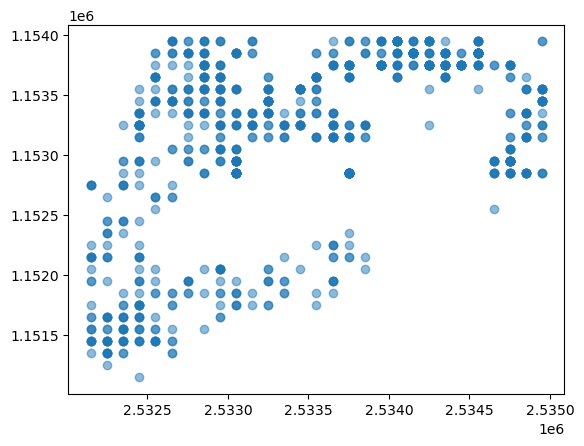

array([[2532250., 1151350.],
       [2533850., 1153850.],
       [2534250., 1153750.],
       ...,
       [2532850., 1153650.],
       [2534650., 1152850.],
       [2532350., 1151650.]], shape=(1000, 2))

In [17]:
pop_demand = population.generate_n(1000, seed = 10)
plt.scatter(pop_demand[:, 0], pop_demand[:, 1], alpha=0.5)
plt.show()
pop_demand

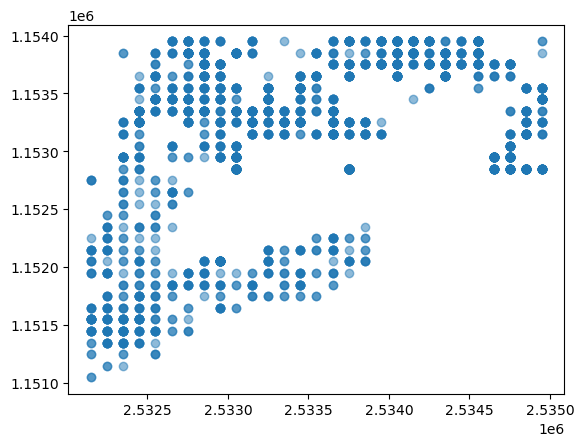

In [18]:
pop_demand2 = population.generate_per_proportion(0.1, seed = 100)
plt.scatter(pop_demand2[:, 0], pop_demand2[:, 1], alpha=0.5)

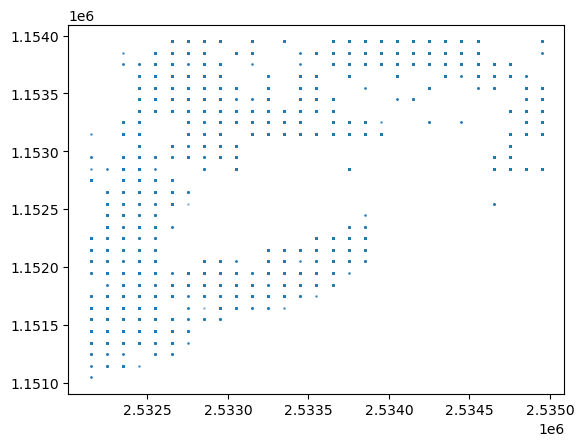

array([[2534750., 1153750.],
       [2532650., 1153850.],
       [2532850., 1152050.],
       ...,
       [2534750., 1152950.],
       [2532750., 1153250.],
       [2534050., 1153750.]], shape=(27262, 2))

In [19]:
pop_demand_jitter = population.generate_per_proportion(proportion=1, precision_in_meter=1, seed = 100)
plt.scatter(pop_demand_jitter[:, 0], pop_demand_jitter[:, 1], alpha=0.5, s=0.5)
plt.show()
pop_demand_jitter

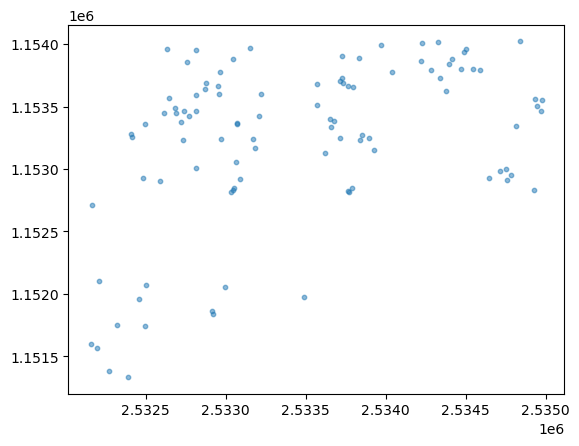

In [20]:
pop_demand_jitter = population.generate_n(100, precision_in_meter=1, seed = 100)
plt.scatter(pop_demand_jitter[:, 0], pop_demand_jitter[:, 1], alpha=0.5, s=10)
plt.show()

### Tasks.geostat.STATENT

In [21]:
statent = STATENT(epfl)
statent.df

POSITION_X  POSITION_Y  SHOPS  SHOPS_EMP  SHOPS_ETP  SHOPS_0  SHOPS_10  \
12331     2532100     1151300      0          0        0.0        0         0   
12332     2532100     1151400      0          0        0.0        0         0   
12333     2532100     1151500      0          0        0.0        0         0   
12334     2532100     1151700      0          0        0.0        0         0   
12335     2532100     1151900      0          0        0.0        0         0   
...           ...         ...    ...        ...        ...      ...       ...   
13730     2535000     1153600      0          0        0.0        0         0   
13731     2535000     1153700      0          0        0.0        0         0   
13732     2535000     1153800      0          0        0.0        0         0   
13733     2535000     1153900      4          4        4.0        4         0   
13734     2535000     1154000      0          0        0.0        0         0   

       SHOPS_50  SHOPS_250  
12331         0          0  
12332         0          0  
12333         0          0  
12334         0          0  
12335         0          0  
...         ...        ...  
13730         0          0  
13731         0          0  
13732         0          0  
13733         0          0  
13734         0          0  

[339 rows x 9 columns]

In [22]:
entreprises = statent.get_entreprises(1, seed=100)
entreprises.df

POSITION_X  POSITION_Y  SHOPS_EMP  SHOPS_ETP
0     2532264.5   1152464.5       1.00   1.000000
1     2532248.5   1152499.5       1.00   1.000000
2     2532204.5   1152465.5       1.00   1.000000
3     2532204.5   1152469.5       1.00   1.000000
4     2532373.5   1151305.5       3.75   2.904415
..          ...         ...        ...        ...
209   2534993.5   1153717.5       3.50   3.004088
210   2534927.5   1153767.5       3.50   3.004088
211   2535008.5   1153298.5       3.25   2.989389
221   2535001.5   1153510.5       1.00   1.000000
222   2535018.5   1153541.5       1.00   1.000000

[185 rows x 4 columns]

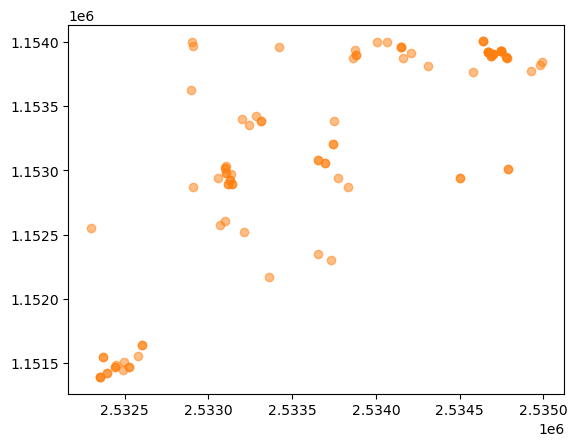

array([[2534700.5, 1153906.5],
       [2532392.5, 1151420.5],
       [2534212.5, 1153911.5],
       [2534744.5, 1153926.5],
       [2533731.5, 1152300.5],
       [2533118.5, 1152892.5],
       [2533096.5, 1152608.5],
       [2534744.5, 1153926.5],
       [2532526.5, 1151467.5],
       [2534579.5, 1153766.5],
       [2534991.5, 1153840.5],
       [2532298.5, 1152549.5],
       [2533654.5, 1153083.5],
       [2534666.5, 1153923.5],
       [2534641.5, 1154005.5],
       [2533131.5, 1152922.5],
       [2534925.5, 1153770.5],
       [2534641.5, 1154005.5],
       [2533773.5, 1152942.5],
       [2532907.5, 1152869.5],
       [2534502.5, 1152941.5],
       [2533315.5, 1153384.5],
       [2533202.5, 1153398.5],
       [2533694.5, 1153056.5],
       [2534149.5, 1153962.5],
       [2534666.5, 1153923.5],
       [2533742.5, 1153201.5],
       [2534784.5, 1153874.5],
       [2532526.5, 1151467.5],
       [2533106.5, 1152981.5],
       [2532576.5, 1151552.5],
       [2534687.5, 1153893.5],
       [

In [23]:
ent_sources = entreprises.generate_n(100, seed = 10)
plt.scatter(ent_sources[:, 0], ent_sources[:, 1], alpha=0.5, c="C1")
plt.show()
ent_sources

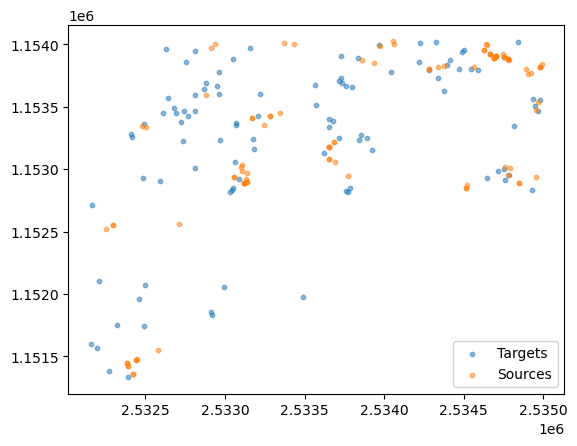

In [24]:
pop_demand_jitter = population.generate_n(100, 1, seed = 100)
plt.scatter(pop_demand_jitter[:, 0], pop_demand_jitter[:, 1], alpha=0.5, s=10, label="Targets")
ent_sources_jitter = entreprises.generate_n(100, seed = 200)
plt.scatter(ent_sources_jitter[:, 0], ent_sources_jitter[:, 1], alpha=0.5, s=10, c="C1", label="Sources")
plt.legend()
plt.show()

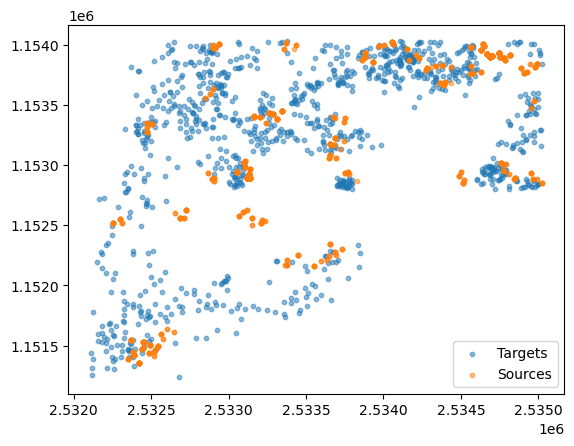

In [25]:
pop_demand_jitter = population.generate_n(1000, 1, seed = 100)
plt.scatter(pop_demand_jitter[:, 0], pop_demand_jitter[:, 1], alpha=0.5, s=10, label="Targets")
ent_sources_jitter = entreprises.generate_n(1000, seed = 200)
plt.scatter(ent_sources_jitter[:, 0], ent_sources_jitter[:, 1], alpha=0.5, s=10, c="C1", label="Sources")
plt.legend()
plt.show()

## TaskManager

In [27]:
from RealDataSimulation.Tasks.taskManager import TaskManager

In [ ]:
tasks_manager = TaskManager(epfl, random_seed=100)
tasks_manager.get_tasks(100, random_seed=100)

pickup_x   pickup_y  delivery_x  delivery_y     distance
0   2533807.5  1152915.5   2533676.5   1153383.5   485.988683
1   2533123.5  1152857.5   2532912.5   1151859.5  1020.061273
2   2533160.5  1153356.5   2533208.5   1153428.5    86.533231
3   2534711.5  1153864.5   2534544.5   1153804.5   177.451402
4   2532307.5  1152479.5   2532158.5   1151597.5   894.497065
..        ...        ...         ...         ...          ...
95  2532325.5  1152524.5   2534337.5   1153731.5  2346.272150
96  2533728.5  1152280.5   2533728.5   1153905.5  1625.000000
97  2533682.5  1152269.5   2532959.5   1153600.5  1514.691388
98  2533339.5  1153438.5   2534646.5   1152927.5  1403.342439
99  2532470.5  1151507.5   2533852.5   1153272.5  2241.684411

[100 rows x 5 columns]

In [6]:
tasks_manager.plot()
plt.legend(scatterpoints=1)

NameError: name 'tasks_manager' is not defined

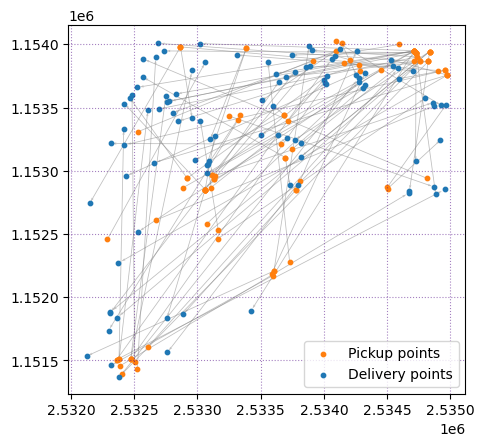

In [ ]:
plt.figure()
tasks_manager.plot(plt.gca(), tasks_manager.get_tasks(100))
plt.gca().set_aspect("equal")
plt.grid(linestyle=":", color="indigo", alpha=0.5)
plt.legend(scatterpoints=1)

In [7]:
tasks_manager.plot(tasks=tasks_manager.get_tasks(100))

NameError: name 'tasks_manager' is not defined

### Map

In [8]:
fig, ax = epfl.plot((tasks_manager, tasks_manager.get_tasks(100, random_seed=10)), margin=0.05)
fig.show()

NameError: name 'tasks_manager' is not defined

## TransportData

In [11]:
from RealDataSimulation.PublicTransport.processing import TransportData

In [12]:
tp = TransportData("epfl", epfl, date = (2025,1,3))
tp.download_data(date_strict=False)

('raw_data\\1_downloaded\\Stops_2025-01-03.csv',
 'raw_data\\1_downloaded\\Timetable_2025-01-03.csv')

In [13]:
tp.filter_data(return_data=False)

In [14]:
lines = tp.get_lines_data()

85:151:1


c:\Users\arsju\anaconda3\envs\oldFolium\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Still 4 distances values missing for line 1 (85:151:1)
                       STOP_NAME  POSITION_X  POSITION_Y  DISTANCE
STOP_NUMBER                                                       
8592001         Lausanne, Boston   2537405.0   1152837.0       NaN
8592010      Lausanne, Chauderon   2537555.0   1152802.0       NaN
8592102         Lausanne, Prélaz   2536612.0   1153116.0       NaN
8592109       Lausanne, Recordon   2537035.0   1153025.0       NaN

Dropping routes Route_G, Route_H, Route_J as their similitude with Route_A is smaller than the threshold (5)
Consequently, dropping journeys 85:151:106, 85:151:137, 85:151:220, 85:151:239, 85:151:134

85:151:24
85:151:25
85:151:31
85:151:32
85:151:33
Removing 154 duplicates for line 33 (85:151:33)
85:151:70
85:151:95
Removing 3 duplicates for line N5 (85:151:95)
85:764:701
Removing 91 duplicates for line 701 (85:764:701)
85:764:705
Removing 2 duplicates for line 705 (85:764:705)


In [15]:
l705 = lines["85:764:705"]
l705.stops

STOP_NUMBER    POSITION_X    POSITION_Y  \
STOP_NAME                                                               
Lonay, parc                       8592254  2.529262e+06  1.153429e+06   
Lonay, Pressoirs                  8595219  2.529507e+06  1.153105e+06   
Lonay-Préverenges, gare nord      8511344  2.529439e+06  1.152899e+06   
Lonay-Préverenges, gare sud       8595218  2.529592e+06  1.152847e+06   
Préverenges, Capellan             8588898  2.529954e+06  1.152437e+06   
Préverenges, village              8579230  2.529987e+06  1.152190e+06   
Denges, Pierraz-Mur               8592240  2.530776e+06  1.151938e+06   
Denges, Sur les Moulins           8592241  2.531176e+06  1.151922e+06   
Denges, La Pale                   8592239  2.531209e+06  1.152348e+06   
Denges, village                   8592242  2.531088e+06  1.152836e+06   
Denges, Les Oches                 8588872  2.531179e+06  1.153156e+06   
Echandens, collège                8595213  2.531135e+06  1.153844e+06   
Echandens, centre                 8588875  2.531142e+06  1.154096e+06   
Echandens, Riaz                   8592243  2.531227e+06  1.154312e+06   
Echandens, Chocolatière           8592244  2.531588e+06  1.154297e+06   
Ecublens VD, Larges Pièces        8592248  2.532232e+06  1.153796e+06   
Ecublens VD, Villars              8591961  2.532675e+06  1.153514e+06   
Ecublens VD, Cocarde              8591946  2.532620e+06  1.153341e+06   
Ecublens VD, Perrettes            8591954  2.532466e+06  1.153147e+06   
Ecublens VD, Motty                8591951  2.532705e+06  1.153108e+06   
Ecublens VD, En Enjalin           8591949  2.532358e+06  1.152927e+06   
Ecublens VD, Coquerellaz          8591947  2.532646e+06  1.152941e+06   
Ecublens VD, Ormet                8591952  2.532495e+06  1.152858e+06   
Ecublens VD, EPFL (bus)           8579233  2.533107e+06  1.152679e+06   
Ecublens VD, Argand               8591944  2.533488e+06  1.152483e+06   
Ecublens VD, EPFL Piccard         8579234  2.533227e+06  1.152483e+06   

                                 DISTANCE Route_A Route_B Route_C Route_D  \
STOP_NAME                                                                   
Lonay, parc                      0.000000    True    True   False   False   
Lonay, Pressoirs               406.249783    True    True   False   False   
Lonay-Préverenges, gare nord   623.392256    True    True   False   False   
Lonay-Préverenges, gare sud    785.302906    True    True   False   False   
Préverenges, Capellan         1332.243488    True    True   False   False   
Préverenges, village          1581.438191    True    True   False   False   
Denges, Pierraz-Mur           2409.704452    True    True   False   False   
Denges, Sur les Moulins       2810.056770    True    True   False   False   
Denges, La Pale               3236.733360    True    True   False   False   
Denges, village               3739.563890    True    True   False   False   
Denges, Les Oches             4072.036605    True    True   False   False   
Echandens, collège            4761.747789    True    True   False   False   
Echandens, centre             5013.708099    True    True    True    True   
Echandens, Riaz               5245.975200    True    True    True    True   
Echandens, Chocolatière       5606.665482    True    True    True    True   
Ecublens VD, Larges Pièces    6423.180546    True    True    True    True   
Ecublens VD, Villars          6947.994956    True    True    True    True   
Ecublens VD, Cocarde          7129.527322    True   False   False    True   
Ecublens VD, Perrettes        7277.023399   False    True    True   False   
Ecublens VD, Motty            7377.547482    True   False   False    True   
Ecublens VD, En Enjalin       7467.955813   False    True    True   False   
Ecublens VD, Coquerellaz      7554.093004    True   False   False    True   
Ecublens VD, Ormet            7587.460104   False    True    True   False   
Ecublens VD, EPFL (bus)       8084.221929    True    True   

Lowered zoom level to keep map size reasonable. (z = 14)


(<Figure size 1600x1600 with 1 Axes>, <Axes: >)

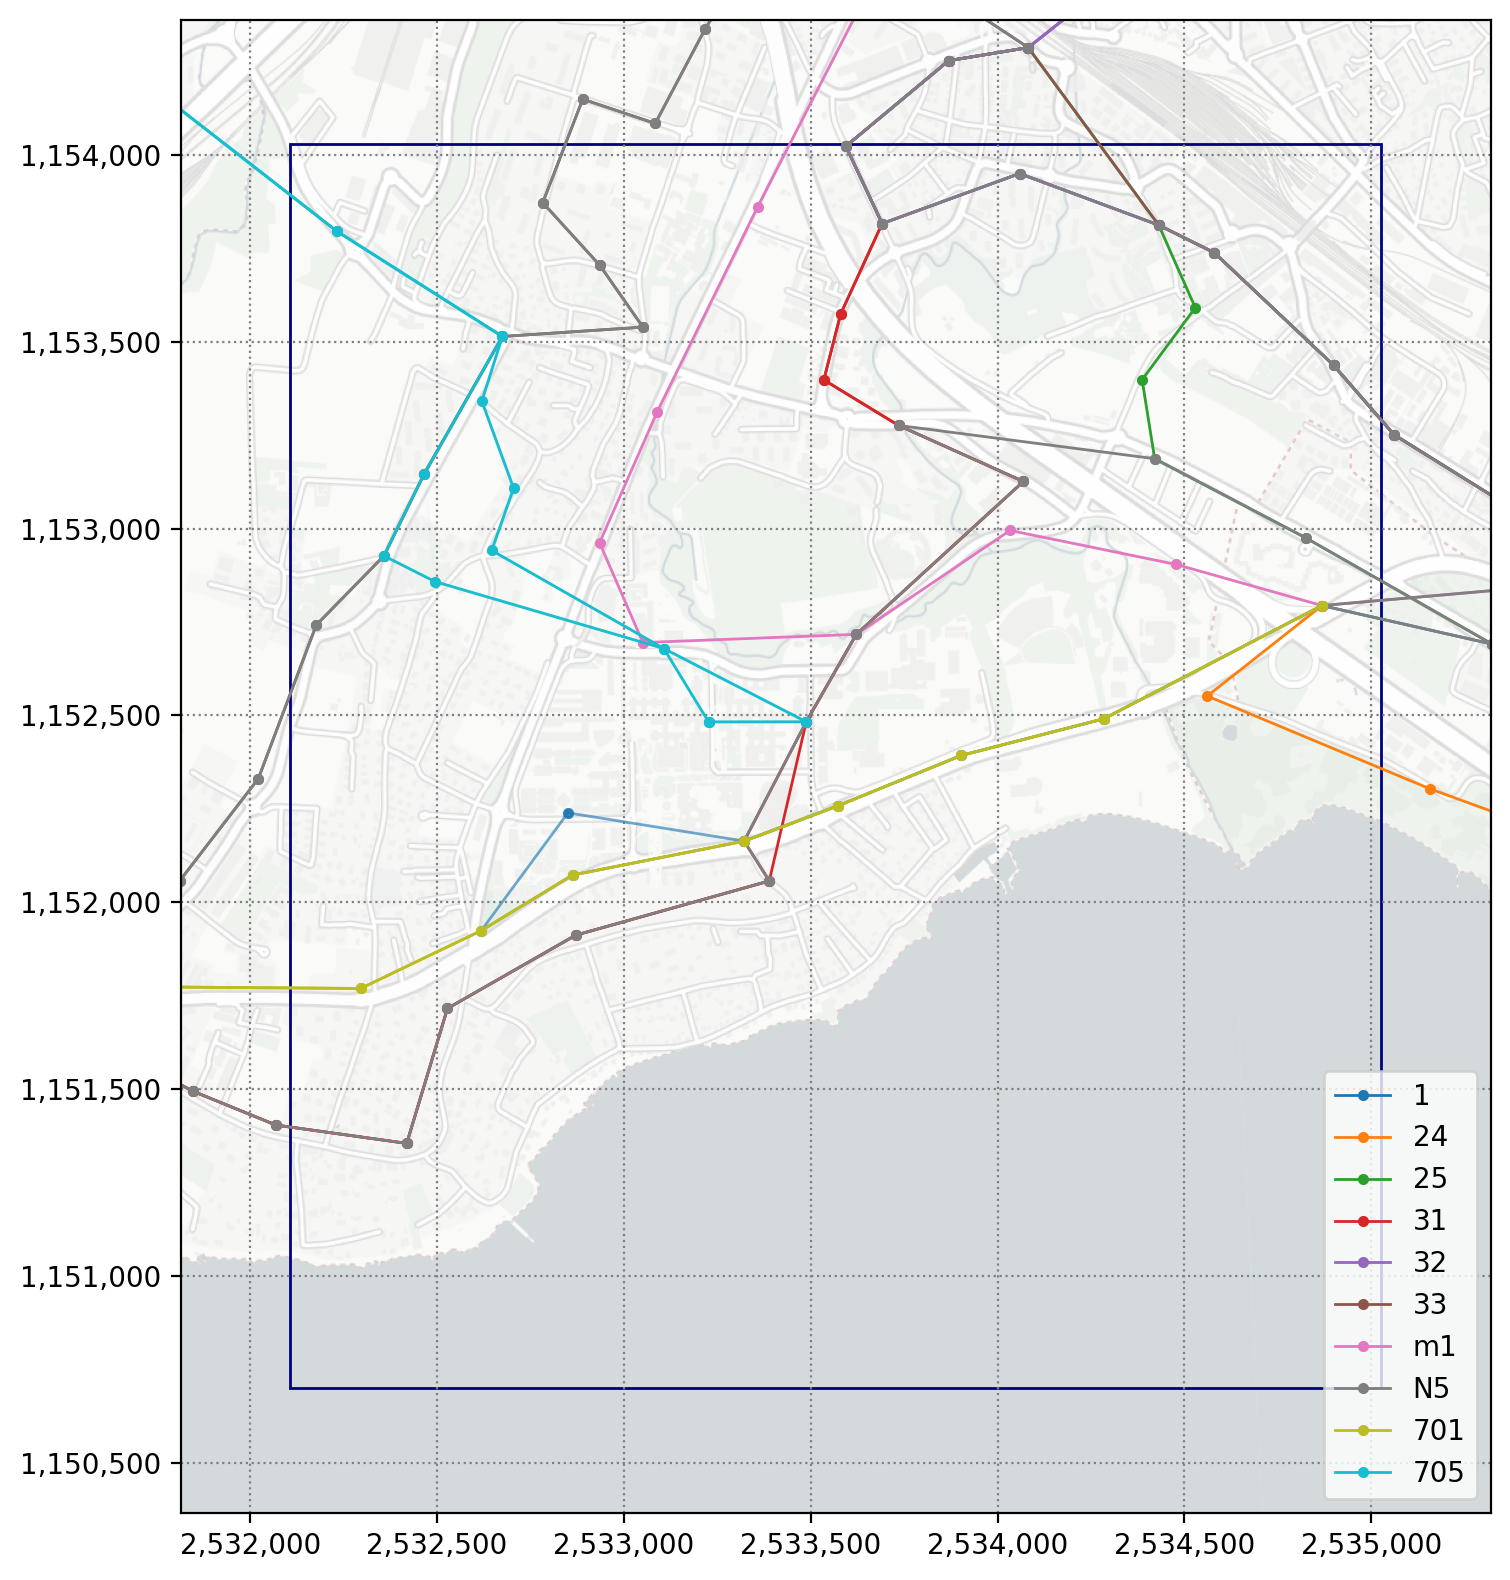

In [16]:
epfl.plot(*lines.values(), margin=0.1)

Lowered zoom level to keep map size reasonable. (z = 13)


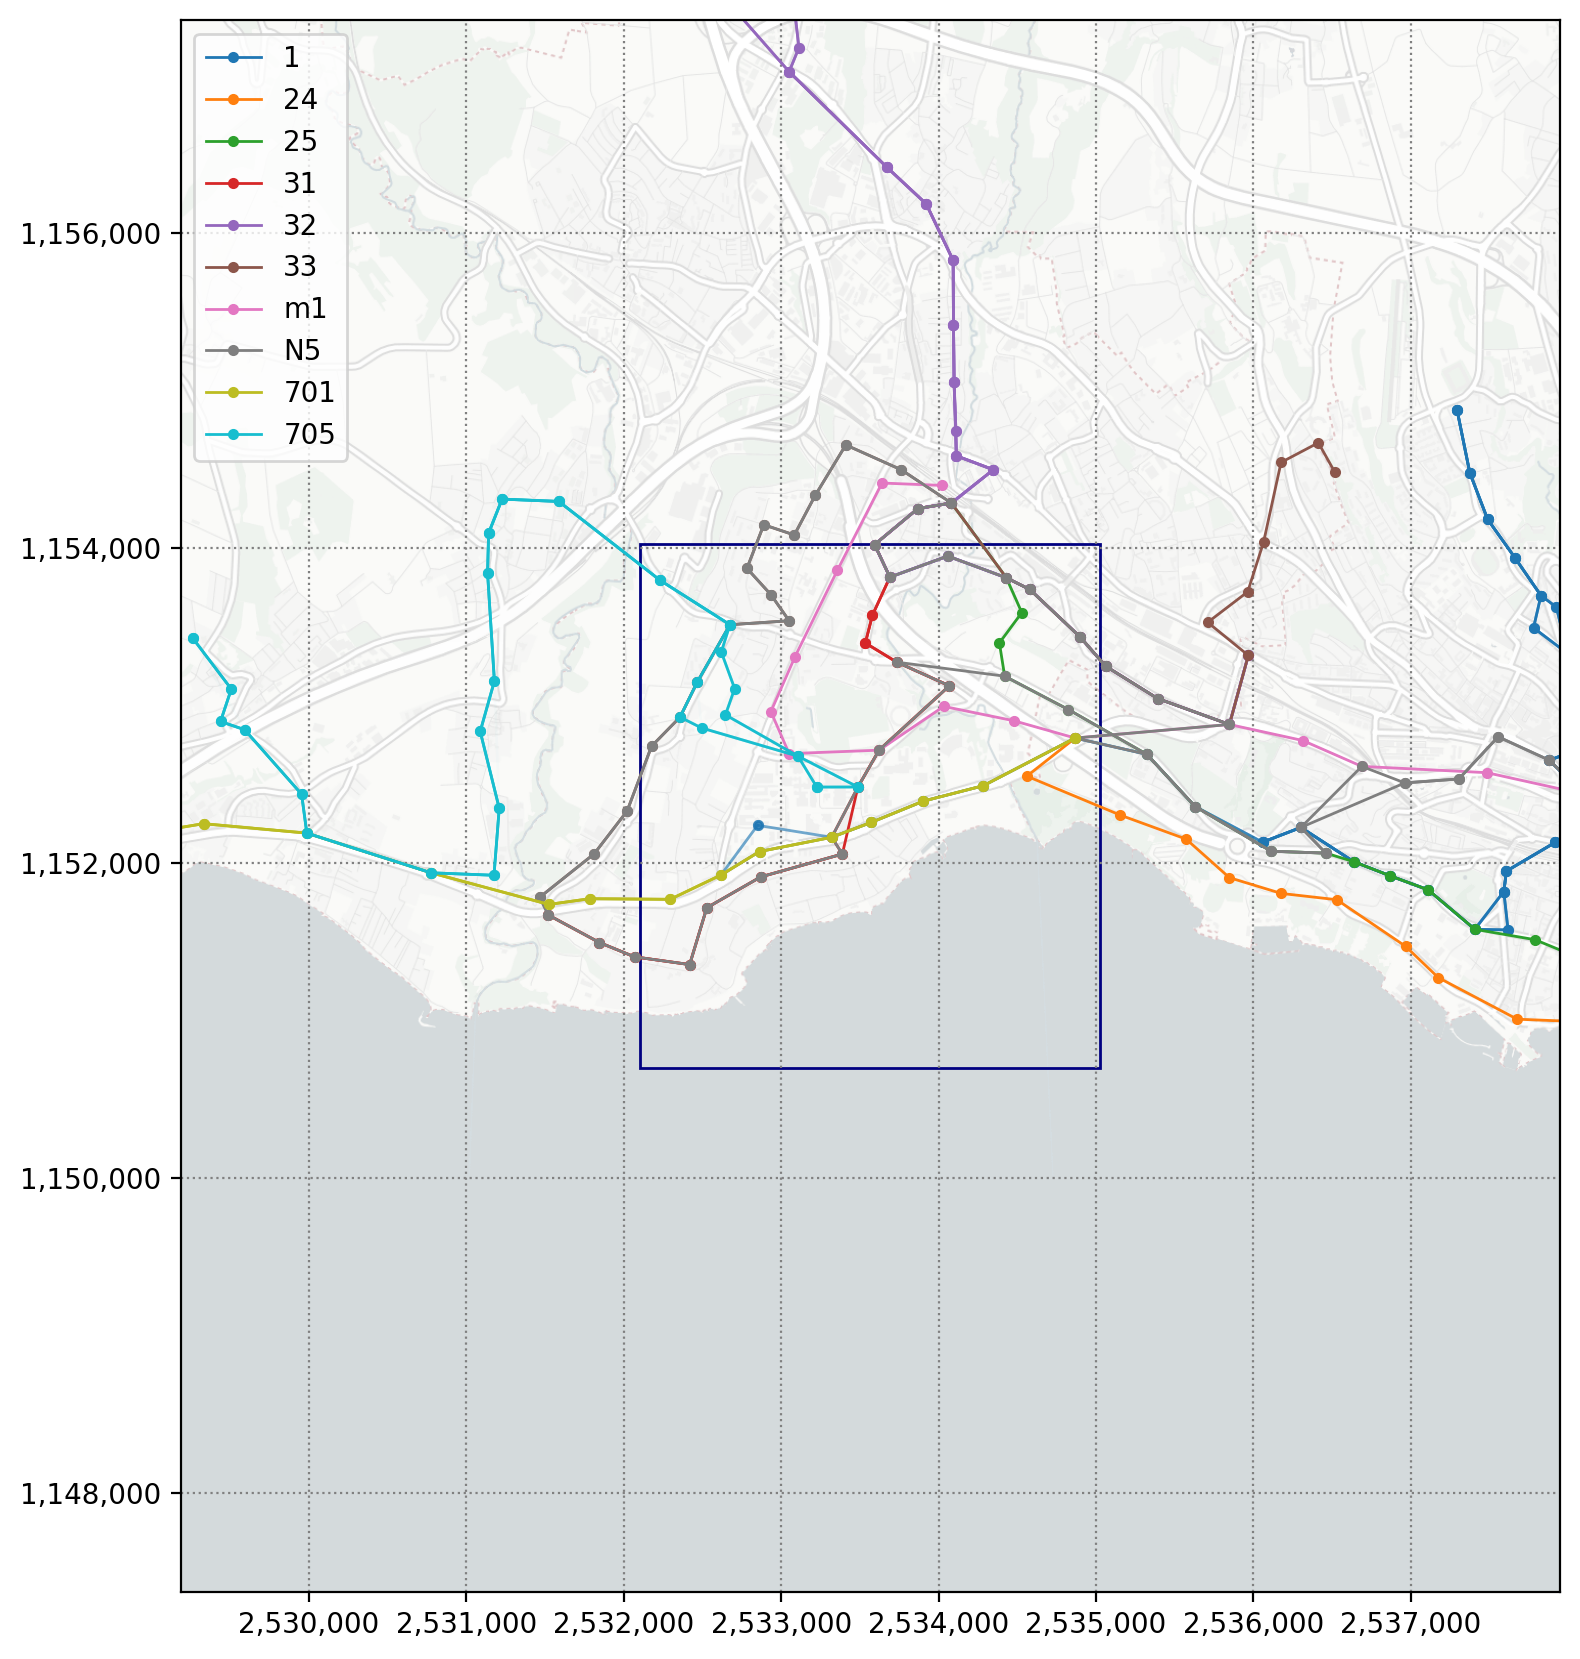

In [17]:
fig, ax = epfl.plot(*lines.values(), margin=1, figsize=(8,10))
plt.show()

### Brol

In [259]:
timetables["85:764:705"]["stops"].convert_dtypes()

STOP_NUMBER     POSITION_X     POSITION_Y  \
STOP_NAME                                                                 
Lonay, parc                       8592254      2529262.0      1153429.0   
Lonay, Pressoirs                  8595219  2529507.31315  1153105.17853   
Lonay-Préverenges, gare nord      8511344  2529438.71944  1152899.15485   
Lonay-Préverenges, gare sud       8595218      2529592.0      1152847.0   
Préverenges, Capellan             8588898      2529954.0      1152437.0   
Préverenges, village              8579230      2529987.0      1152190.0   
Denges, Pierraz-Mur               8592240      2530776.0      1151938.0   
Denges, Sur les Moulins           8592241  2531176.04448  1151922.30311   
Denges, La Pale                   8592239  2531209.31847   1152347.6803   
Denges, village                   8592242  2531088.48382  1152835.77612   
Denges, Les Oches                 8588872  2531178.62831  1153155.79499   
Echandens, collège                8595213  2531135.13246   1153844.1333   
Echandens, centre                 8588875      2531142.0      1154096.0   
Echandens, Riaz                   8592243   2531227.4023  1154311.99642   
Echandens, Chocolatière           8592244  2531587.78513  1154297.10699   
Ecublens VD, Larges Pièces        8592248  2532232.11857  1153795.57806   
Ecublens VD, Villars              8591961      2532675.0      1153514.0   
Ecublens VD, Cocarde              8591946      2532620.0      1153341.0   
Ecublens VD, Perrettes            8591954      2532466.0      1153147.0   
Ecublens VD, Motty                8591951      2532705.0      1153108.0   
Ecublens VD, En Enjalin           8591949      2532358.0      1152927.0   
Ecublens VD, Coquerellaz          8591947  2532646.40257  1152941.46273   
Ecublens VD, Ormet                8591952      2532495.0      1152858.0   
Ecublens VD, EPFL (bus)           8579233      2533107.0      1152679.0   
Ecublens VD, Argand               8591944      2533488.0      1152483.0   
Ecublens VD, EPFL Piccard         8579234  2533226.62602  1152482.70215   
Count                                <NA>           <NA>           <NA>   
Direction                            <NA>           <NA>           <NA>   

                                 DISTANCE Route_A Route_B Route_C Route_D  \
STOP_NAME                                                                   
Lonay, parc                           0.0    True    True   False   False   
Lonay, Pressoirs               406.249783    True    True   False   False   
Lonay-Préverenges, gare nord   623.392256    True    True   False   False   
Lonay-Préverenges, gare sud    785.302906    True    True   False   False   
Préverenges, Capellan         1332.243488    True    True   False   False   
Préverenges, village          1581.438191    True    True   False   False   
Denges, Pierraz-Mur           2409.704452    True    True   False   False   
Denges, Sur les Moulins        2810.05677    True    True   False   False   
Denges, La Pale                3236.73336    True    True   False   False   
Denges, village                3739.56389    True    True   False   False   
Denges, Les Oches             4072.036605    True    True   False   False   
Echandens, collège            4761.747789    True    True   False   False   
Echandens, centre             5013.708099    True    True    True    True   
Echandens, Riaz                 5245.9752    True    True    True    True   
Echandens, Chocolatière       5606.665482    True    True    True    True   
Ecublens VD, Larges Pièces    6423.180546    True    True    True    True   
Ecublens VD, Villars          6947.994956    True    True    True    True   
Ecublens VD, Cocarde          7129.527322    True   False   False    True   
Ecublens VD, Perrettes        7277.023399   False    True    True   False   
Ecublens VD, Motty            7377.547482    True   False   False    True   
Ecublens VD, En Enjalin       7467.955813   False    True    True   False   
Ecublens

JOURNEY_ID                    85:764:5001_705-A-101_0540_BNE5  \
STOP_NAME                                                       
Denges, La Pale                                           8.0   
Denges, Les Oches                                        10.0   
Denges, Pierraz-Mur                                       6.0   
Denges, Sur les Moulins                                   7.0   
Denges, village                                           9.0   
Echandens, Chocolatière                                  14.0   
Echandens, Riaz                                          13.0   
Echandens, centre                                        12.0   
Echandens, collège                                       11.0   
Ecublens VD, Argand                                      21.0   
Ecublens VD, Cocarde                                     17.0   
Ecublens VD, Coquerellaz                                 19.0   
Ecublens VD, EPFL (bus)                                  20.0   
Ecublens VD, EPFL Piccard                                22.0   
Ecublens VD, En Enjalin                                  -1.0   
Ecublens VD, Larges Pièces                               15.0   
Ecublens VD, Motty                                       18.0   
Ecublens VD, Ormet                                       -1.0   
Ecublens VD, Perrettes                                   -1.0   
Ecublens VD, Villars                                     16.0   
Lonay, Pressoirs                                          1.0   
Lonay, parc                                               0.0   
Lonay-Préverenges, gare nord                              2.0   
Lonay-Préverenges, gare sud                               3.0   
Préverenges, Capellan                                     4.0   
Préverenges, village                                      5.0   

JOURNEY_ID                    85:764:5003_705-A-101_0600_BNE5  \
STOP_NAME                                                       
Denges, La Pale                                           8.0   
Denges, Les Oches                                        10.0   
Denges, Pierraz-Mur                                       6.0   
Denges, Sur les Moulins                                   7.0   
Denges, village                                           9.0   
Echandens, Chocolatière                                  14.0   
Echandens, Riaz                                          13.0   
Echandens, centre                                        12.0   
Echandens, collège                                       11.0   
Ecublens VD, Argand                                      21.0   
Ecublens VD, Cocarde                                     17.0   
Ecublens VD, Coquerellaz                                 19.0   
Ecublens VD, EPFL (bus)                                  20.0   
Ecublens VD, EPFL Piccard                                22.0   
Ecublens VD, En Enjalin                                  -1.0   
Ecublens VD, Larges Pièces                               15.0   
Ecublens VD, Motty                                       18.0   
Ecublens VD, Ormet                                       -1.0   
Ecublens VD, Perrettes                                   -1.0   
Ecublens VD, Villars                                     16.0   
Lonay, Pressoirs                                          1.0   
Lonay, parc                                               0.0   
Lonay-Préverenges, gare nord                              2.0   
Lonay-Préverenges, gare sud                               3.0   
Préverenges, Capellan                                     4.0   
Préverenges, village                                      5.0   

JOURNEY_ID                    85:764:5000_705-R-201_0618_BNE5  \
STOP_NAME                                                       
Denges, La Pale                                          13.0   
Denges, Les Oches                                        11.0   
Denges, Pierraz-Mur                                      15.0   
Denges, Sur les Moulins          

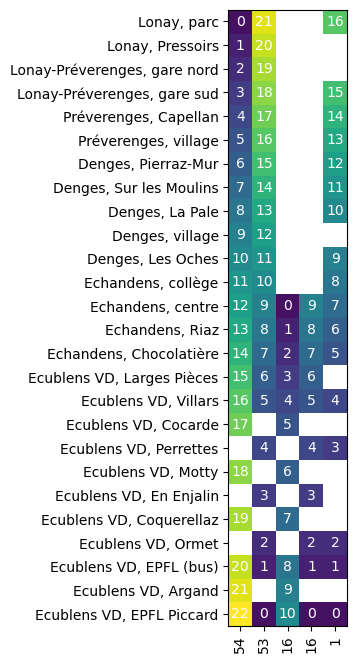

In [206]:
line_timetable: pd.DataFrame = timetables["85:764:705"]["real"]
journeys = line_timetable.groupby("STOP_NAME", sort=False).first()

journeys = journeys.apply(lambda x : x.dropna().sort_values().argsort(), axis=0).fillna(-1)
display(journeys)

unique_journeys = journeys.T.value_counts().reset_index().astype("int").set_index("count").T
unique_journeys = unique_journeys.sort_index(key=lambda x: x.map(timetables["85:764:705"]["stops"].DISTANCE))

#display(unique_journeys)
plt.figure(figsize = (8,8))
plt.imshow(unique_journeys, alpha=(unique_journeys>=0).astype("short"))
plt.xticks(np.arange(len(unique_journeys.columns)),unique_journeys.columns, rotation=90)
plt.yticks(np.arange(len(unique_journeys.index)),unique_journeys.index)

ax = plt.gca()
for i in range(unique_journeys.shape[0]):
    for j in range(unique_journeys.shape[1]):
        text = ax.text(j, i, unique_journeys.iloc[i, j],
                       ha="center", va="center", color="w")
plt.show()


count                             2      2      1      1      1
Lonay, parc                   False   True  False   True   True
Lonay, Pressoirs              False   True  False  False   True
Lonay-Préverenges, gare nord  False   True  False  False   True
Lonay-Préverenges, gare sud   False   True  False   True   True
Préverenges, Capellan         False   True  False   True   True
Préverenges, village          False   True  False   True   True
Denges, Pierraz-Mur           False   True  False   True   True
Denges, Sur les Moulins       False   True  False   True   True
Denges, La Pale               False   True  False   True   True
Denges, village               False   True  False  False   True
Denges, Les Oches             False   True  False   True   True
Echandens, collège            False   True  False   True   True
Echandens, centre              True   True   True   True   True
Echandens, Riaz                True   True   True   True   True
Echandens, Chocolatière        True   True   True   True   True
Ecublens VD, Larges Pièces     True   True   True  False   True
Ecublens VD, Villars           True   True   True   True   True
Ecublens VD, Cocarde          False  False   True  False   True
Ecublens VD, Perrettes         True   True  False   True  False
Ecublens VD, Motty            False  False   True  False   True
Ecublens VD, En Enjalin        True   True  False  False  False
Ecublens VD, Coquerellaz      False  False   True  False   True
Ecublens VD, Ormet             True   True  False   True  False
Ecublens VD, EPFL (bus)        True   True   True   True   True
Ecublens VD, Argand           False  False   True  False   True
Ecublens VD, EPFL Piccard      True   True   True   True   True

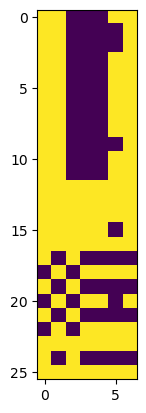

In [185]:
mask = unique_journeys >= 0
plt.imshow(mask)
mask.T.value_counts().reset_index().set_index("count").T

In [202]:
line_timetable.iloc(axis=0)[:, ::-1, :]

IndexingError: Too many indexers

## Brol

In [46]:
a = dict()
a[2]

KeyError: 2

In [63]:
from RealDataSimulation.PublicTransport.linedata import LinesData

In [64]:
l = LinesData()

In [65]:
l["l705"] = l705

In [69]:
l["85:764:705"]

In [45]:
df = pd.DataFrame({12: [1,2,3], 22: [3,4,5]})
a, b = df.values.T
a, b

(array([1, 2, 3]), array([3, 4, 5]))

In [6]:
a = np.arange(10).reshape((-1,2))
a[:3]

array([[0, 1],
       [2, 3],
       [4, 5]])

In [2]:
import numpy as np

In [141]:
np.random.Generator.integers(5, size=(10,2)) * 20

TypeError: integers() takes at least 1 positional argument (0 given)

In [145]:
np.random.default_rng?

Signature:      np.random.default_rng(seed=None)
Call signature: np.random.default_rng(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction default_rng at 0x000002173823DA40>
Docstring:     
default_rng(seed=None)
Construct a new Generator with the default BitGenerator (PCG64).

    Parameters
    ----------
    seed : {None, int, array_like[ints], SeedSequence, BitGenerator, Generator, RandomState}, optional
        A seed to initialize the `BitGenerator`. If None, then fresh,
        unpredictable entropy will be pulled from the OS. If an ``int`` or
        ``array_like[ints]`` is passed, then all values must be non-negative and will be
        passed to `SeedSequence` to derive the initial `BitGenerator` state. One may also
        pass in a `SeedSequence` instance.
        Additionally, when passed a `BitGenerator`, it will be wrapped by
        `Generator`. If passed a `Generator`, it will be returned unaltered.
        When passed a legacy `Rando

In [32]:
from datetime import datetime

In [33]:
datetime1 = datetime(2024, 12, 10, 12, 0, 0)
datetime1.date()

datetime.date(2024, 12, 10)

In [34]:
df = pd.read_csv("data/1_downloaded/Timetable_2024-12-10.csv", sep=";", low_memory=False)
df.sample(5)

BETRIEBSTAG                FAHRT_BEZEICHNER BETREIBER_ID  \
2284556  10.12.2024                  85:883:66739-0       85:883   
2060988  10.12.2024  85:881:TPG009-4503784321757755       85:881   
2040823  10.12.2024  85:881:TPG005-4503784321268771       85:881   
2137707  10.12.2024  85:881:TPG022-4503784321217168       85:881   
1197477  10.12.2024               85:811:70351-0070       85:811   

        BETREIBER_ABK                     BETREIBER_NAME PRODUKT_ID  \
2284556           BSU  Busbetrieb Solothurn und Umgebung        Bus   
2060988           TPG        Transports Publics Genevois        Bus   
2040823           TPG        Transports Publics Genevois        Bus   
2137707           TPG        Transports Publics Genevois        Bus   
1197477          AAGL                 Autobus AG Liestal        Bus   

             LINIEN_ID LINIEN_TEXT UMLAUF_ID VERKEHRSMITTEL_TEXT  ...  \
2284556       85:883:7           7       723                   B  ...   
2060988  85:881:TPG009           9       NaN                   B  ...   
2040823  85:881:TPG005           5       NaN                   B  ...   
2137707  85:881:TPG022          22       NaN                   B  ...   
1197477      85:811:70          70       NaN                   B  ...   

         FAELLT_AUS_TF    BPUIC             HALTESTELLEN_NAME  \
2284556          False  8587367  Röthenbach b. H., Rest. Post   
2060988          False  8592797        Genève, Camille-Martin   
2040823          False  8592950       Grand-Saconnex, Palexpo   
2137707          False  8587437           Carouge GE, Rondeau   
1197477          False  8578323           Bubendorf Unterdorf   

             ANKUNFTSZEIT          AN_PROGNOSE AN_PROGNOSE_STATUS  \
2284556  10.12.2024 10:45  10.12.2024 10:46:43               REAL   
2060988  10.12.2024 15:57  10.12.2024 15:56:11           PROGNOSE   
2040823  10.12.2024 14:23  10.12.2024 14:23:03           PROGNOSE   
2137707  10.12.2024 13:14  10.12.2024 13:12:06           PROGNOSE   
1197477  10.12.2024 12:39  10.12.2024 12:41:38               REAL   

             ABFAHRTSZEIT          AB_PROGNOSE AB_PROGNOSE_STATUS  \
2284556  10.12.2024 10:45  10.12.2024 10:46:56               REAL   
2060988  10.12.2024 15:57  10.12.2024 15:56:25           PROGNOSE   
2040823  10.12.2024 14:23  10.12.2024 14:23:29           PROGNOSE   
2137707               NaN                  NaN                NaN   
1197477  10.12.2024 12:39  10.12.2024 12:41:39               REAL   

        DURCHFAHRT_TF  
2284556         False  
2060988         False  
2040823         False  
2137707         False  
1197477         False  

[5 rows x 21 columns]

In [35]:
df.PRODUKT_ID.value_counts()

PRODUKT_ID
Bus            1920328
Tram            253166
Zug             163500
BUS             112255
Metro             5101
Zahnradbahn       1653
Schiff             176
Name: count, dtype: int64

In [44]:
', '.join(df.PRODUKT_ID.iloc[:5].astype(str))

'Zug, Zug, Zug, Zug, Zug'

In [47]:
df.ANKUNFTSZEIT.is_unique

False